In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
# Replace the path below with the actual path to your CSV file if it's not in the same directory as your Jupyter Notebook
file_path = 'commodities_data.csv'

# Read the CSV file
df = pd.read_csv(file_path)

In [7]:
# Convert the datetime column to a datetime object
#df['datetime'] = pd.to_datetime(df['datetime'], format='%Y-%m-%d %H:%M')

# Convert the 'datetime' column to datetime objects
df['datetime'] = pd.to_datetime(df['datetime'])

In [8]:
# Display the first few rows of the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79852830 entries, 0 to 79852829
Data columns (total 8 columns):
 #   Column      Dtype         
---  ------      -----         
 0   id          int64         
 1   quantity    int64         
 2   unit_price  int64         
 3   time_left   object        
 4   item.id     int64         
 5   item.name   object        
 6   item.class  object        
 7   datetime    datetime64[ns]
dtypes: datetime64[ns](1), int64(4), object(3)
memory usage: 4.8+ GB


In [9]:
df.head()

,id,quantity,unit_price,time_left,item.id,item.name,item.class,datetime
0,1899749198,15,109400,SHORT,184090,Potion of the Psychopomp's Speed,Consumables,2023-12-28 15:41:00
1,1899749311,1,2000,SHORT,168650,Cragscale,Trade Goods,2023-12-28 15:41:00
2,1899749353,6,2400,SHORT,152576,Tidespray Linen,Trade Goods,2023-12-28 15:41:00
3,1899749415,2,290200,SHORT,76885,Burning Primal Diamond,Gems,2023-12-28 15:41:00
4,1899749701,1,9707000,SHORT,139362,Glyph of Mana Touched Souls,Glyphs,2023-12-28 15:41:00


In [10]:
# Group by 'item.class' and count unique 'item.id'
class_counts = df.groupby('item.class')['item.id'].nunique()

print("Number of unique items for each item class:")
print(class_counts)

Number of unique items for each item class:
item.class
Armor              11
Consumables      3201
Gems             1003
Glyphs            111
Miscellaneous    1979
Recipes             3
Trade Goods      2093
Unknown           701
Name: item.id, dtype: int64


In [11]:
# Replace 'Unknown' with NaN for item.name and item.class
df['item.name'] = df['item.name'].replace('Unknown', pd.NA)
df['item.class'] = df['item.class'].replace('Unknown', pd.NA)

# Count the total number of items
total_items = len(df)

# Count items where 'name' or 'class' is missing or 'Unknown'
missing_name = len(df[df['item.name'].isna()])
missing_class = len(df[df['item.class'].isna()])
missing_both = len(df[df['item.name'].isna() & df['item.class'].isna()])

# Print the results
print(f"Total rows: {total_items:,}")
print(f"Rows missing name: {missing_name:,}")
print(f"Rows missing class: {missing_class:,}")
print(f"Rows missing both name and class: {missing_both:,}")


Total rows: 79,852,830
Rows missing name: 6,902
Rows missing class: 7,323,232
Rows missing both name and class: 6,902


In [12]:

# Group by 'item.id', 'item.name', and 'datetime', then calculate min, max, median, and mean unit_price
price_stats = df.groupby(['item.id', 'item.name', 'datetime'])['unit_price'].agg(['min', 'max', 'median', 'mean']).reset_index()

# Sort the DataFrame by 'datetime' in ascending order
price_stats_sorted = price_stats.sort_values(by='datetime', ascending=True)

# Display the first 10 rows of the sorted DataFrame
price_stats_sorted.head(10)

,item.id,item.name,datetime,min,max,median,mean
0,117,Tough Jerky,2023-12-22 18:41:00,100,2554690000,100.0,2.045379e+07
1645568,163077,Glacier Bay Halibut,2023-12-22 18:41:00,10400,10800,10800.0,1.067857e+04
1110774,76616,Perfect Veiled Roguestone,2023-12-22 18:41:00,650000,27950000,14300000.0,1.430000e+07
607348,38919,Enchant 2H Weapon - Savagery,2023-12-22 18:41:00,809700,809800,809700.0,8.097250e+05
843668,52140,Perfect Artful Hessonite,2023-12-22 18:41:00,19500,19500,19500.0,1.950000e+04
1975262,192746,Curio of Yore,2023-12-22 18:41:00,25000,480009800,32300.0,3.103014e+07
1110489,76615,Perfect Accurate Roguestone,2023-12-22 18:41:00,49500,47750000,49750.0,1.197475e+07
1110225,76614,Perfect Glinting Roguestone,2023-12-22 18:41:00,16600,16600,16600.0,1.660000e+04
1111059,76617,Perfect Retaliating Roguestone,2023-12-22 18:41:00,114300,47750000,115400.0,8.083433e+06
311553,20869,Amber Idol,2023-12-22 18:41:00,7000,14800,14800.0,1.168000e+04


In [13]:
print(f"Number of rows: {len(df):,}")
# Drop rows where either 'item.name' or 'item.class' is NA
cleaned_df = df.dropna(subset=['item.name', 'item.class'])
print(f"Number of rows after removing NAs: {len(cleaned_df):,}")

Number of rows: 79,852,830
Number of rows after removing NAs: 72,529,598


/var/folders/y2/14_x44lj4j5dz2lmwv2s62pc0000gn/T/ipykernel_4230/1616256757.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_df['unit_price_scaled'] = cleaned_df['unit_price'] / 10000


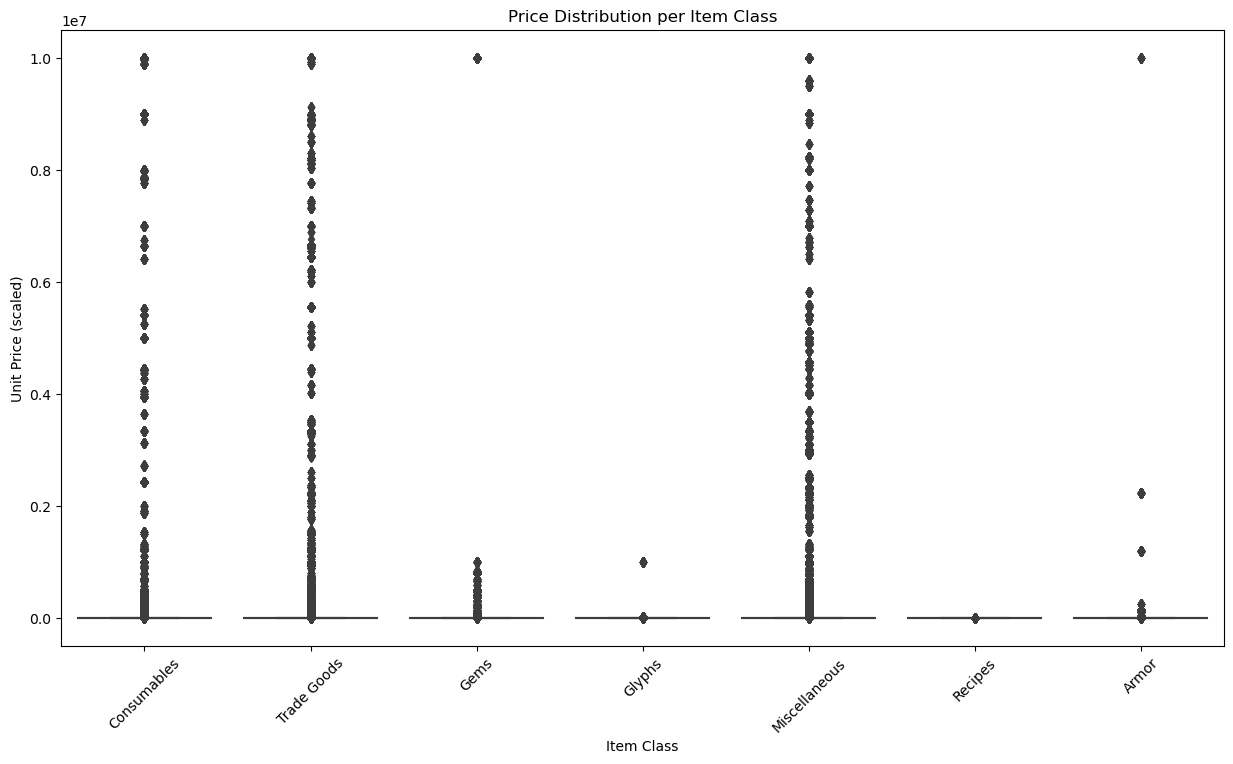

In [14]:
# Convert 'unit_price' to a more manageable scale if needed (e.g., dividing by 10000)
cleaned_df['unit_price_scaled'] = cleaned_df['unit_price'] / 10000

# Filter out rows with missing or irrelevant item classes if necessary
# df = df[df['item.class'].isin(['Armor', 'Consumables', 'Gems', ...])]

# Create a boxplot
plt.figure(figsize=(15, 8))
sns.boxplot(x='item.class', y='unit_price_scaled', data=cleaned_df)

plt.title('Price Distribution per Item Class')
plt.xlabel('Item Class')
plt.ylabel('Unit Price (scaled)')
plt.xticks(rotation=45)  # Rotates the item class names for better readability
plt.show()

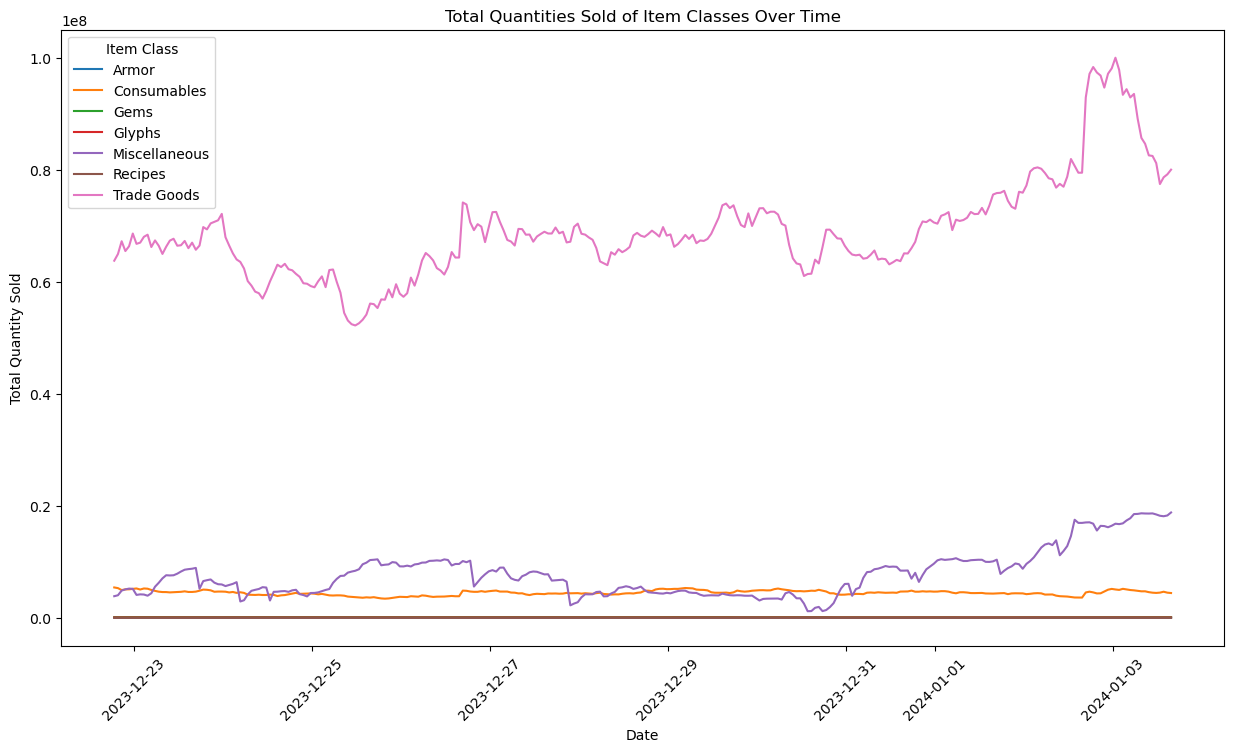

In [16]:
# Group by date and item class, then sum the quantities
total_quantities = cleaned_df.groupby(['datetime', 'item.class'])['quantity'].sum().reset_index()

# Plotting
plt.figure(figsize=(15, 8))
sns.lineplot(x='datetime', y='quantity', hue='item.class', data=total_quantities)
plt.title('Total Quantities Sold of Item Classes Over Time')
plt.xlabel('Date')
plt.ylabel('Total Quantity Sold')
plt.xticks(rotation=45)
plt.legend(title='Item Class')
plt.show()

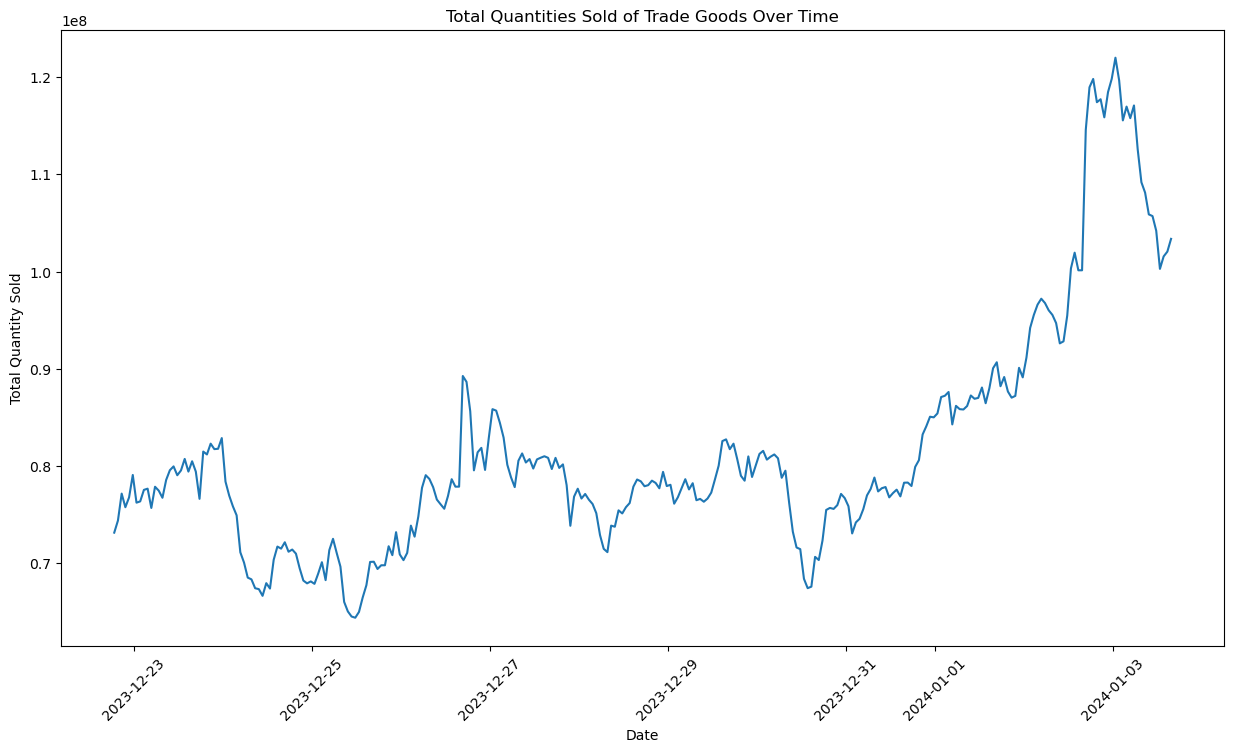

In [17]:
# Group by date, then sum the quantities for Trade Goods
total_quantities_trade_goods = cleaned_df.groupby('datetime')['quantity'].sum().reset_index()

# Plotting
plt.figure(figsize=(15, 8))
sns.lineplot(x='datetime', y='quantity', data=total_quantities_trade_goods)
plt.title('Total Quantities Sold of Trade Goods Over Time')
plt.xlabel('Date')
plt.ylabel('Total Quantity Sold')
plt.xticks(rotation=45)
plt.show()